In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML projects/insurance (2).csv')
df.head() #first 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


target variable: charges - Individual medical costs billed by health insurance

In [ ]:
df.info() #information rows n columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


total 7 columns

*   3 continuous columns: age, bmi, charges 
*   4 categorical coulmns: sex, children, smoker, region



In [ ]:
df.dtypes #datatypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [3]:
df.isnull().sum() #checking null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe() #5 point summary

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


75% people have 2 or less children

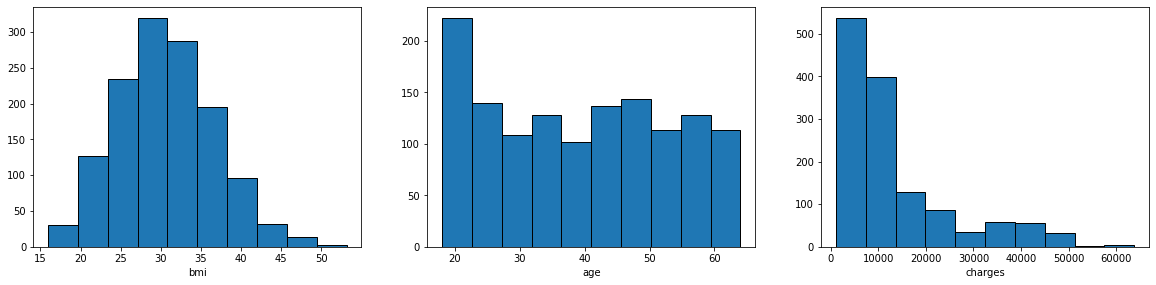

In [ ]:
# distribution of continous columns : bmi, age, charges 
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi,edgecolor='black')
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, edgecolor='black')
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, edgecolor='black')
plt.xlabel('charges')

plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

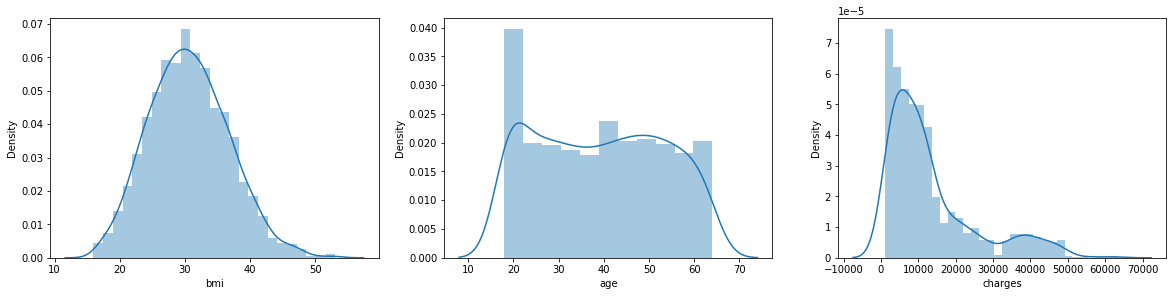

In [ ]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(df.bmi,kde=True)

plt.subplot(3,3,2)
sns.distplot(df.age,kde=True)

plt.subplot(3,3,3)
sns.distplot(df.charges,kde=True)

plt.show()

bmi-normally distributed;
age-uniformally distributed;
charges-highly skewed

In [ ]:
skew=pd.DataFrame({'skewness_values':[df.bmi.skew(), df.age.skew(), df.charges.skew()]},index=('bmi','age','charges'))
skew

,skewness_values
bmi,0.284047
age,0.055673
charges,1.515880


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


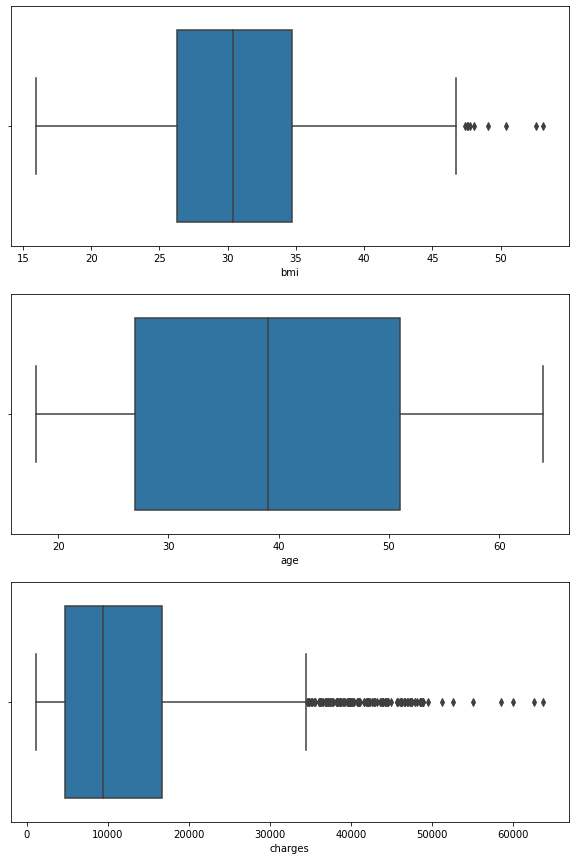

In [ ]:
#checking the presence of outliers in bmi, age, charges
plt.figure(figsize= (10,15))
plt.subplot(3,1,1)
sns.boxplot(df.bmi)

plt.subplot(3,1,2)
sns.boxplot(df.age)


plt.subplot(3,1,3)
sns.boxplot(df.charges)

plt.show()

bmi- some outliers; age- no outliers; charges- many outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

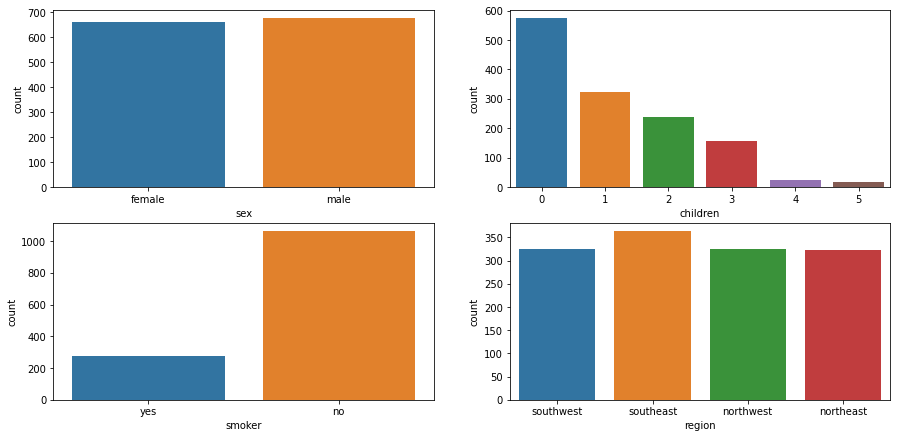

In [ ]:
# distribution of categorical columns : sex, children, smoker, region
plt.figure(figsize= (15,15))
plt.subplot(4,2,1)
sns.countplot(df.sex)

plt.subplot(4,2,2)
sns.countplot(df.children)


plt.subplot(4,2,3)
sns.countplot(df.smoker)


plt.subplot(4,2,4)
sns.countplot(df.region)

plt.show()



*   sex: distributed evenly
*   children: most people are having 0 to 1 children
*   smoker: more non smoker than smoker 
*   region: distributed evenly across all regions 





/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

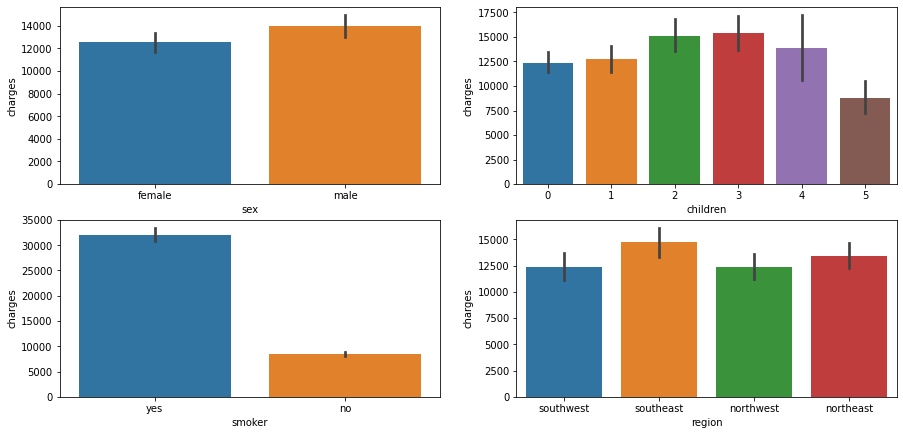

In [ ]:
# barplot - categorical data and target column
plt.figure(figsize= (15,15))
plt.subplot(4,2,1)
sns.barplot(df.sex,df.charges)

plt.subplot(4,2,2)
sns.barplot(df.children,df.charges)


plt.subplot(4,2,3)
sns.barplot(df.smoker,df.charges)


plt.subplot(4,2,4)
sns.barplot(df.region,df.charges)

plt.show()

In [ ]:
# applying label encoder to categorical data
import copy
from sklearn.preprocessing import LabelEncoder
dfc=copy.deepcopy(df)
dfc.loc[:,['sex','smoker','region']]= dfc.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)

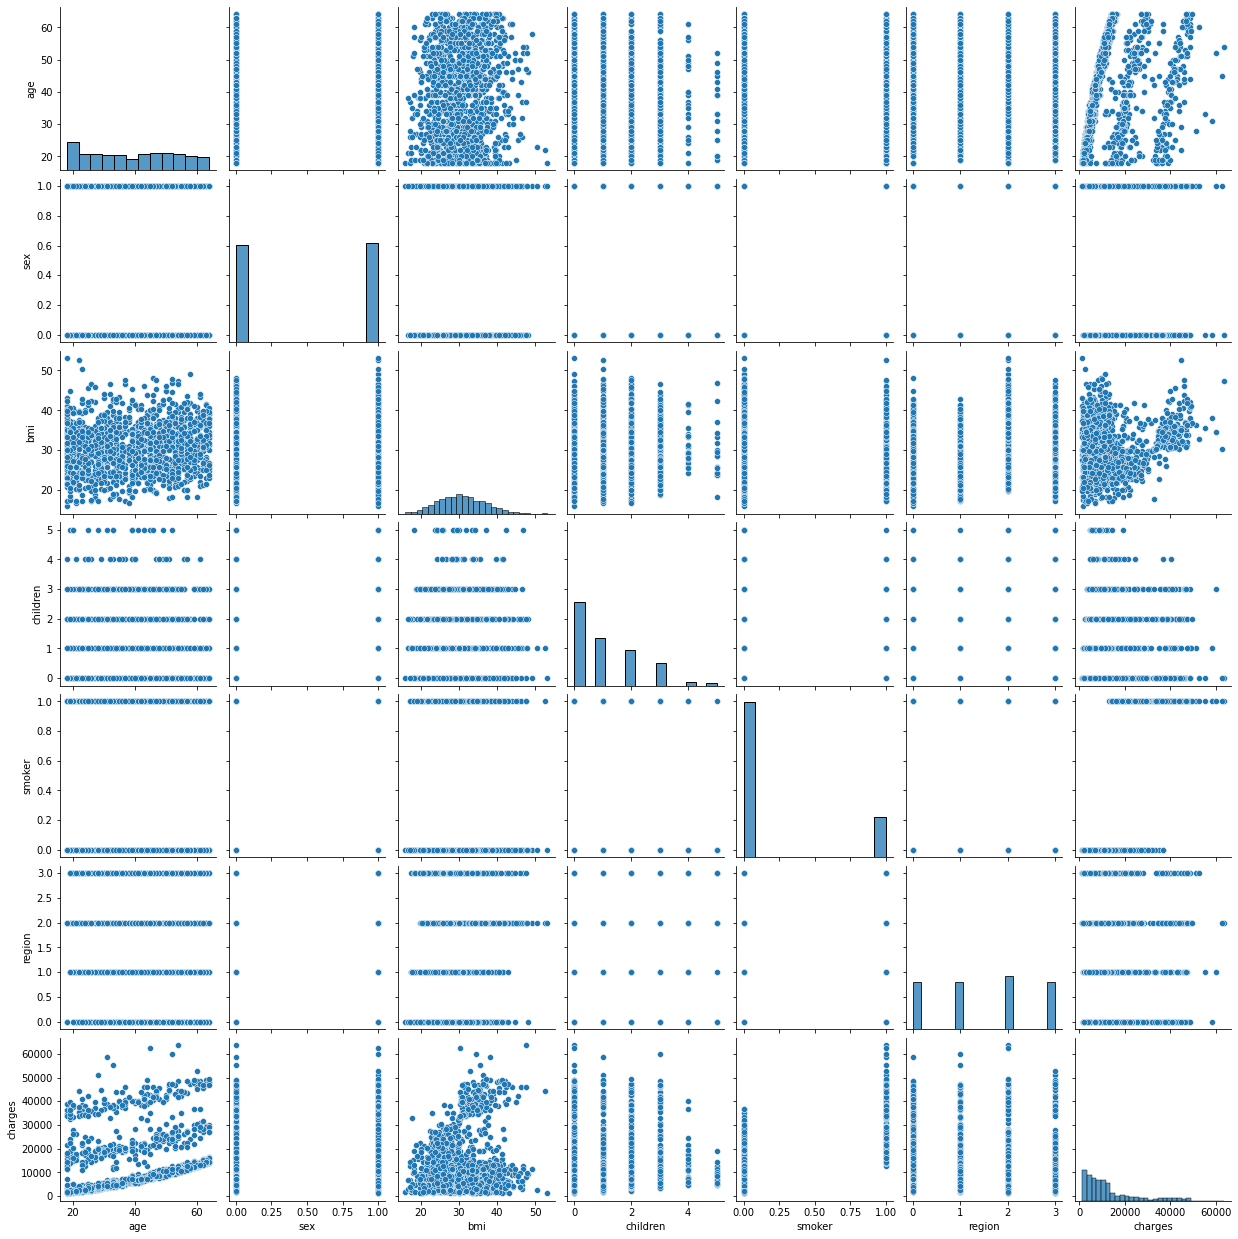

In [ ]:
sns.pairplot(dfc)



*   age: older people are charged more than the younger ones
*   sex: charges of male are slightly more than females
*   bmi: charges are more for people with bmi in range (30-40)
*   children: charges are more for people with 2-3 children
*   smoker: charges of smoker are more than non smokers
*   region: charges of people living in southeast are max and southwest are min



In [ ]:
# Do charges of people who smoke differ significantly from the people who don't?
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


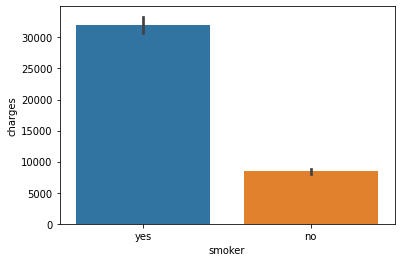

In [ ]:
sns.barplot(df.smoker,df.charges)

the difference between charges of smokers and charges of non-smokers is clearly visible. Now we have to propose a hypothesis and provide a statistic test to support this.

In [ ]:
# T-test
import scipy.stats as stats

Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not same"   # Stating the Alternate Hypothesis
x=np.array(df[df.smoker=='yes'].charges)
y=np.array(df[df.smoker=='no'].charges)
t, p = stats.ttest_ind(x,y) #performing an independent t test
print('test statistic:',t)
print('p value:',p)
if p<0.05:   # Setting our significance level at 5%
  print(f'{Ha} as the p value({p}) < 0.05') 
else:
  print(f'{Ho} as the p value({p}) > 0.05') 


test statistic: 46.664921172723716
p value: 8.271435842177219e-283
Charges of smoker and non-smoker are not the same as the p value(8.271435842177219e-283) < 0.05


In [ ]:
# Does bmi of males differ significantly from that of females?
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


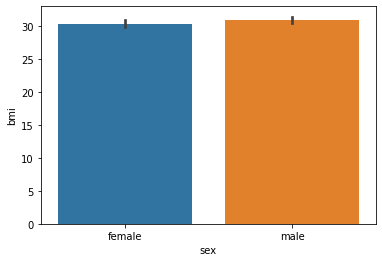

In [ ]:
sns.barplot(df.sex,df.bmi)

There is no significant difference btween bmi of male and female. Now we have to propose a hypothesis and provide a statistic test to support this

In [ ]:
#T-test
Ho = "bmi of male and female are same"   # Stating the Null Hypothesis
Ha = "bmi of male and female are not same"   # Stating the Alternate Hypothesis
x=np.array(df[df.sex=='male'].bmi)
y=np.array(df[df.sex=='female'].bmi)
t, p = stats.ttest_ind(x,y) #performing an independent t test
print('test statistic:',t)
print('p value:',p)
if p<0.05:   # Setting our significance level at 5%
  print(f'{Ha} as the p value({p}) < 0.05') 
else:
  print(f'{Ho} as the p value({p}) > 0.05') 


test statistic: 1.696752635752224
p value: 0.08997637178984932
bmi of male and female are same as the p value(0.08997637178984932) > 0.05


In [ ]:
# Is the proportion of smokers significantly different in different genders?
cross=pd.crosstab(df.smoker,df.sex)
cross

sex,female,male
smoker,,
no,547,517
yes,115,159


In [ ]:
# Chi-square test
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis
chi, p,dof,expected=  stats.chi2_contingency(cross)

if p < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p.round(3)}) > 0.05')

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


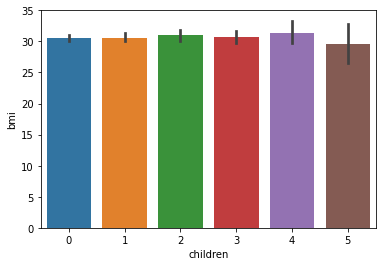

In [ ]:
#  Is the distribution of bmi across women with no children, one child and two children, the same?
sns.barplot(df.children,df.bmi)

In [ ]:
#F-test
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female = copy.deepcopy(df[df['sex'] == 'female'])

zero = female[female.children == 0]['bmi']
one = female[female.children == 1]['bmi']
two = female[female.children == 2]['bmi']


f, p = stats.f_oneway(zero,one,two)


if p < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
